## 1. 상승장/하락장 알리미(스레드 사용)

 - 상승장/하락장 알리미에 코인의 가격만을 조회하는 전용 스레드를 추가하면 메인 스레드는 GUI를 담당하고,
 
   추가한 스레드는 가격 조회만을 담당하기 때문에 버벅대는 문제를 해결할 수 있음

In [1]:
import sys
from PyQt5.QtWidgets import *
from PyQt5 import uic
from PyQt5.QtCore import *
import pybithumb
import time

tickers = ["BTC", "LTC", "BSV", "ZIL"]
form_class = uic.loadUiType("Long_or_Short_Alarm.ui")[0]

class Worker(QThread):
    finished = pyqtSignal(dict)
    
    def run(self):
        while True :
            data = {}
            
            for ticker in tickers :
                data[ticker] = self.get_market_infos(ticker)
                
                self.finished.emit(data)
                time.sleep(2)
                
    def get_market_infos(self, ticker):
        try :
            df = pybithumb.get_ohlcv(ticker)
            ma5 = df['close'].rolling(window=5).mean()
            last_ma5 = ma5[-2]
            price = pybithumb.get_current_price(ticker)
            
            state=None
            if price > last_ma5 :
                state = "상승장"
                
            else:
                state = "하락장"
                
            return price, last_ma5, state
        
        except :
            return None, None, None
        
class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)
        
        self.worker = Worker()
        self.worker.finished.connect(self.update_table_widget)
        self.worker.start()
        
    @pyqtSlot(dict)
    
    def update_table_widget(self, data):
        try :
            for ticker, infos in data.items():
                index = tickers.index(ticker)
                
                self.tableWidget.setItem(index, 0, QTableWidgetItem(ticker))
                self.tableWidget.setItem(index, 1, QTableWidgetItem(str(infos[0])))
                self.tableWidget.setItem(index, 2, QTableWidgetItem(str(infos[1])))
                self.tableWidget.setItem(index, 3, QTableWidgetItem(str(infos[2])))
                
        except :
            pass
                
app = QApplication(sys.argv)
window = MyWindow()
window.show()
app.exec_()

0

It failed TypeError


## 2. 결과

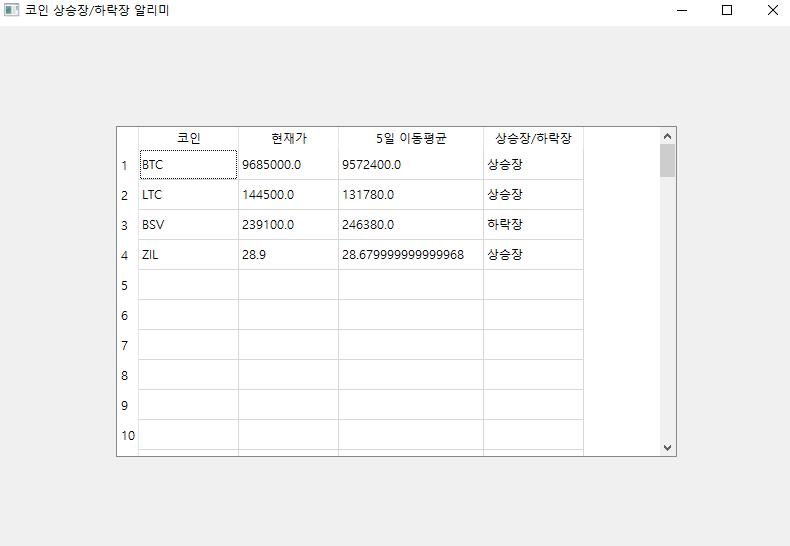

In [3]:
from IPython.display import Image
Image("../1. Data/Thread_Alarm.png")